In [1]:
#importing libraries
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.model_selection import train_test_split

In [2]:
music = pd.read_csv("cleaned_music.csv")
music

Unnamed: 0  index  popularity  acousticness  danceability  duration_ms  \
0               0      1        31.0       0.01270         0.622     218293.0   
1               1      2        28.0       0.00306         0.620     215613.0   
2               2      3        34.0       0.02540         0.774     166875.0   
3               3      4        32.0       0.00465         0.638     222369.0   
4               4      6        46.0       0.02890         0.572     214408.0   
...           ...    ...         ...           ...           ...          ...   
40555       40555  49999        56.0       0.13300         0.849     237667.0   
40556       40556  50001        72.0       0.15700         0.709     251860.0   
40557       40557  50002        51.0       0.00597         0.693     189483.0   
40558       40558  50003        65.0       0.08310         0.782     262773.0   
40559       40559  50004        67.0       0.10200         0.862     267267.0   

       energy  instrumentalness key  liveness  loudness   mode  speechiness  \
0       0.890          0.950000   D     0.124    -7.043  Minor       0.0300   
1       0.755          0.011800  G#     0.534    -4.617  Major       0.0345   
2       0.700          0.002530  C#     0.157    -4.498  Major       0.2390   
3       0.587          0.909000  F#     0.157    -6.266  Major       0.0413   
4       0.803          0.000008   B     0.106    -4.294  Major       0.3510   
...       ...               ...  ..       ...       ...    ...          ...   
40555   0.660          0.000008   C     0.296    -7.195  Major       0.0516   
40556   0.362          0.000000   B     0.109    -9.814  Major       0.0550   
40557   0.763          0.000000   D     0.143    -5.443  Major       0.1460   
40558   0.472          0.000000   G     0.106    -5.016  Minor       0.0441   
40559   0.642          0.000000  F#     0.272   -13.652  Minor       0.1010   

         tempo  valence music_genre  
0      115.002    0.531  Electronic  
1      127.994    0.333  Electronic  
2      128.014    0.270  Electronic  
3      145.036    0.323  Electronic  
4      149.995    0.230  Electronic  
...        ...      ...         ...  
40555   99.988    0.629     Hip-Hop  
40556  122.043    0.113     Hip-Hop  
40557  131.079    0.395     Hip-Hop  
40558   75.886    0.354     Hip-Hop  
40559   99.201    0.765     Hip-Hop  

[40560 rows x 16 columns]

In [3]:
music = music.drop(["Unnamed: 0"], axis = 1)

From the table, unknown column "Unnamed: 0" spotted. Hence, removed.

# 3) Exploratory Analysis

A brief check shows that most of the features hold numerical values except three columns which has categorical data. 

In [4]:
music.head()

index  popularity  acousticness  danceability  duration_ms  energy  \
0      1        31.0       0.01270         0.622     218293.0   0.890   
1      2        28.0       0.00306         0.620     215613.0   0.755   
2      3        34.0       0.02540         0.774     166875.0   0.700   
3      4        32.0       0.00465         0.638     222369.0   0.587   
4      6        46.0       0.02890         0.572     214408.0   0.803   

   instrumentalness key  liveness  loudness   mode  speechiness    tempo  \
0          0.950000   D     0.124    -7.043  Minor       0.0300  115.002   
1          0.011800  G#     0.534    -4.617  Major       0.0345  127.994   
2          0.002530  C#     0.157    -4.498  Major       0.2390  128.014   
3          0.909000  F#     0.157    -6.266  Major       0.0413  145.036   
4          0.000008   B     0.106    -4.294  Major       0.3510  149.995   

   valence music_genre  
0    0.531  Electronic  
1    0.333  Electronic  
2    0.270  Electronic  
3    0.323  Electronic  
4    0.230  Electronic

## 3a) Visualizing Data

In this segment, we will look at the distribution of each audio variable. 
E.g, spread of the data in terms of valence, danceability etc. To better understand how the tracks are distributed, we are using histograms and bar plot. Checking the behaviour of the songs corresponding to an audio feature.


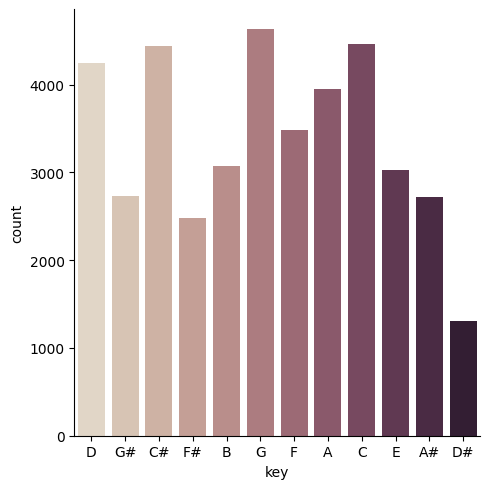

In [5]:
sns.catplot(data=music, x= "key", kind="count", palette="ch:.25")

The plot shows how many times each key is present in the dataset. From the plot, It shows that the tracks are quite spread with Key G being the most popular and Key D# least popular. Every songs have distinct keys.

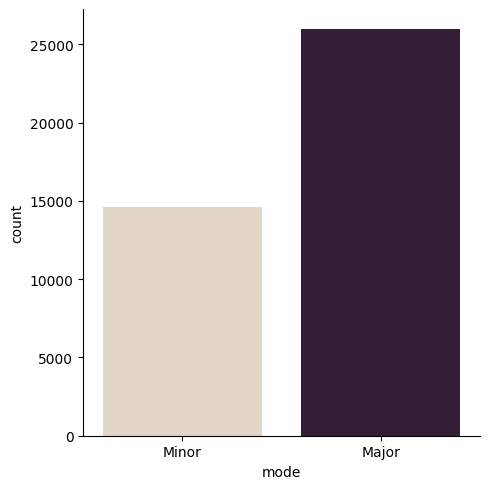

In [6]:
sns.catplot(data=music, x= "mode", kind="count", palette="ch:.25")

The plot shows the distribution of modes for the dataset. From the plot, there are more songs with major mode than minor. However, nothing much can be derived from this.

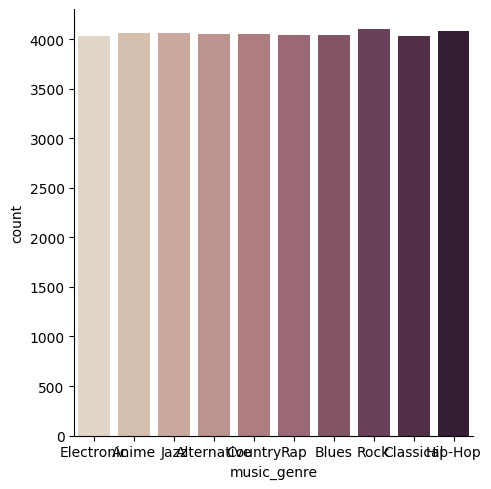

In [7]:
sns.catplot(data=music, x= "music_genre", kind="count", palette="ch:.25",)

The plot shows the number of songs for each genre. From the plot, Music_genre classes are evenly spreaded with 4000 songs in each class. A balanced dataset makes training a model easier because it helps prevent the model from becoming biased towards one class. Now we will move on to view the distributions of numeric variables. 

## 3b) Continous variables

In this segment, we will be using density plot to view the distribution of each numeric variables. We will remove the categorical variables from the dataframe since they are not related. 

In [8]:
numeric_features = music.drop(["key", "music_genre", "mode"], axis = 1)

### Kernel Density Estimate (KDE) plot

Following code plots a 3x4 density plot, displaying each numeric variable's distribution.

KDEPlot (Kernel Density Estimate Plot) is a data visualization technique used to estimate the probability density function of a continuous random variable. It is often used in statistical analysis to visualize the distribution of a dataset.

It is a useful tool for understanding the distribution of a dataset and identifying patterns and relationships in the data.





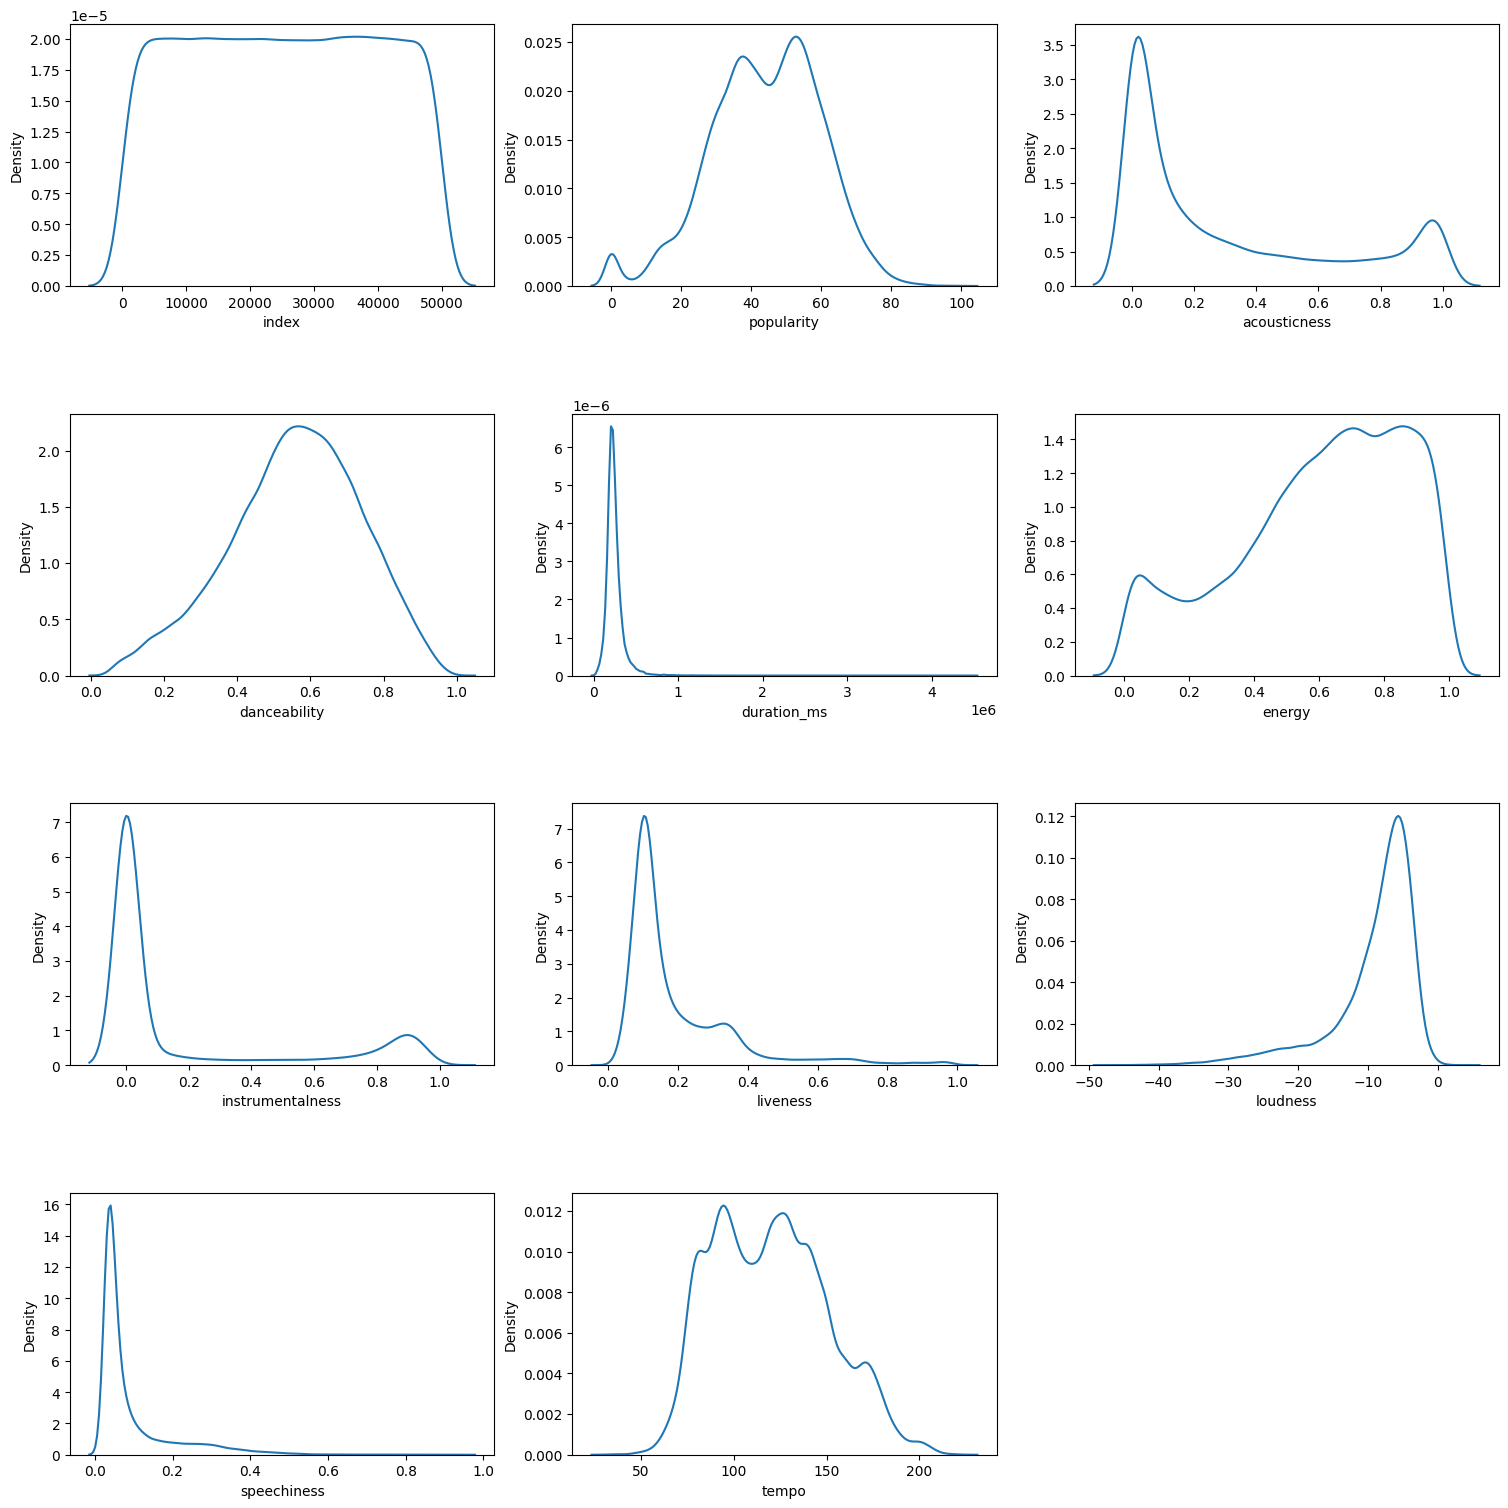

In [9]:
fig, axs = plt.subplots(ncols = 3, nrows = 4, figsize = (15, 15))
fig.delaxes(axs[3][2])
index = 0

axs = axs.flatten()
for k, v in numeric_features.items():
    sns.kdeplot(v, ax = axs[index])
    index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

Popularity: Defines how popular the songs are ranging from 0 to 100. The data seems to be normally distributed. However at certain popularity level, there exists a large number of songs in that popularity level. Which seems very odd. However, it is good to see the data normally distributed to see distinct difference between the songs.

Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. From the KDEplot, most of the songs has an acousticness of 0.0 whereas the rest of songs seem to be evenly spread across 0.0 to 1.0. 
 
Danceability: How suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. In the KDEplot, the model has a normal distribution. Majority of songs have the danceability of between 0.4 to 0.8. 
 
Duration_ms: The duration of the track in milliseconds. All the songs lies below 0.5x10^6 Ms marking.
 
Energy: It is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. The energy of the songs are quite widely spread across 0 to 1. Each song seems to have a different range of energy. Which may be useful in our prediction.
 
Instrumentalness: Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Almost 90% of the songs do not contains vocals. While there's about 5% of the songs do contains high instrumentalness of 0.9.
 
Liveness: Higher liveness values represent an increased probability that the track was performed live. From the KDEplot, The chances of songs recording live is not very high. With majority of the songs lies below 0.4 Liveness.

Loudness: The overall loudness of a track in decibels (dB). Values typically range between -60 and 0 db. In our dataset, majority of our songs have loudness of between -10 to 0. Relatively quiet.
 
Speechiness: It detects the presence of spoken words in a track. Values above 0.66 describe tracks that are probably made entirely of spoken words. Between 0.33 and 0.66 describe tracks that may contain both music and speech. Values below 0.33 most likely represent music and other non-speech-like tracks. In our dataset, Almost all the songs do not contains any spoken words in the track. With only a small part with 0.3 to 0.4 contain both music and speech.
 
Tempo measures the beats per minute (bpm) of a song. It is the speed or pace of a given piece and derives directly from the average beat duration. The distribution of the song tempo are quite widely spread. Every song does contain a different level of tempo. Which could be 1 of the characteristic for our prediction.
 
Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. High valence sound more positive (e.g. happy, cheerful, euphoric), while low valence sound more negative (e.g. sad, depressed, angry). The valence of the songs are quite evenly spread out. Each track in the dataset contains different valence. No outliers seen in the KDEplot.
 


## Boxenplot

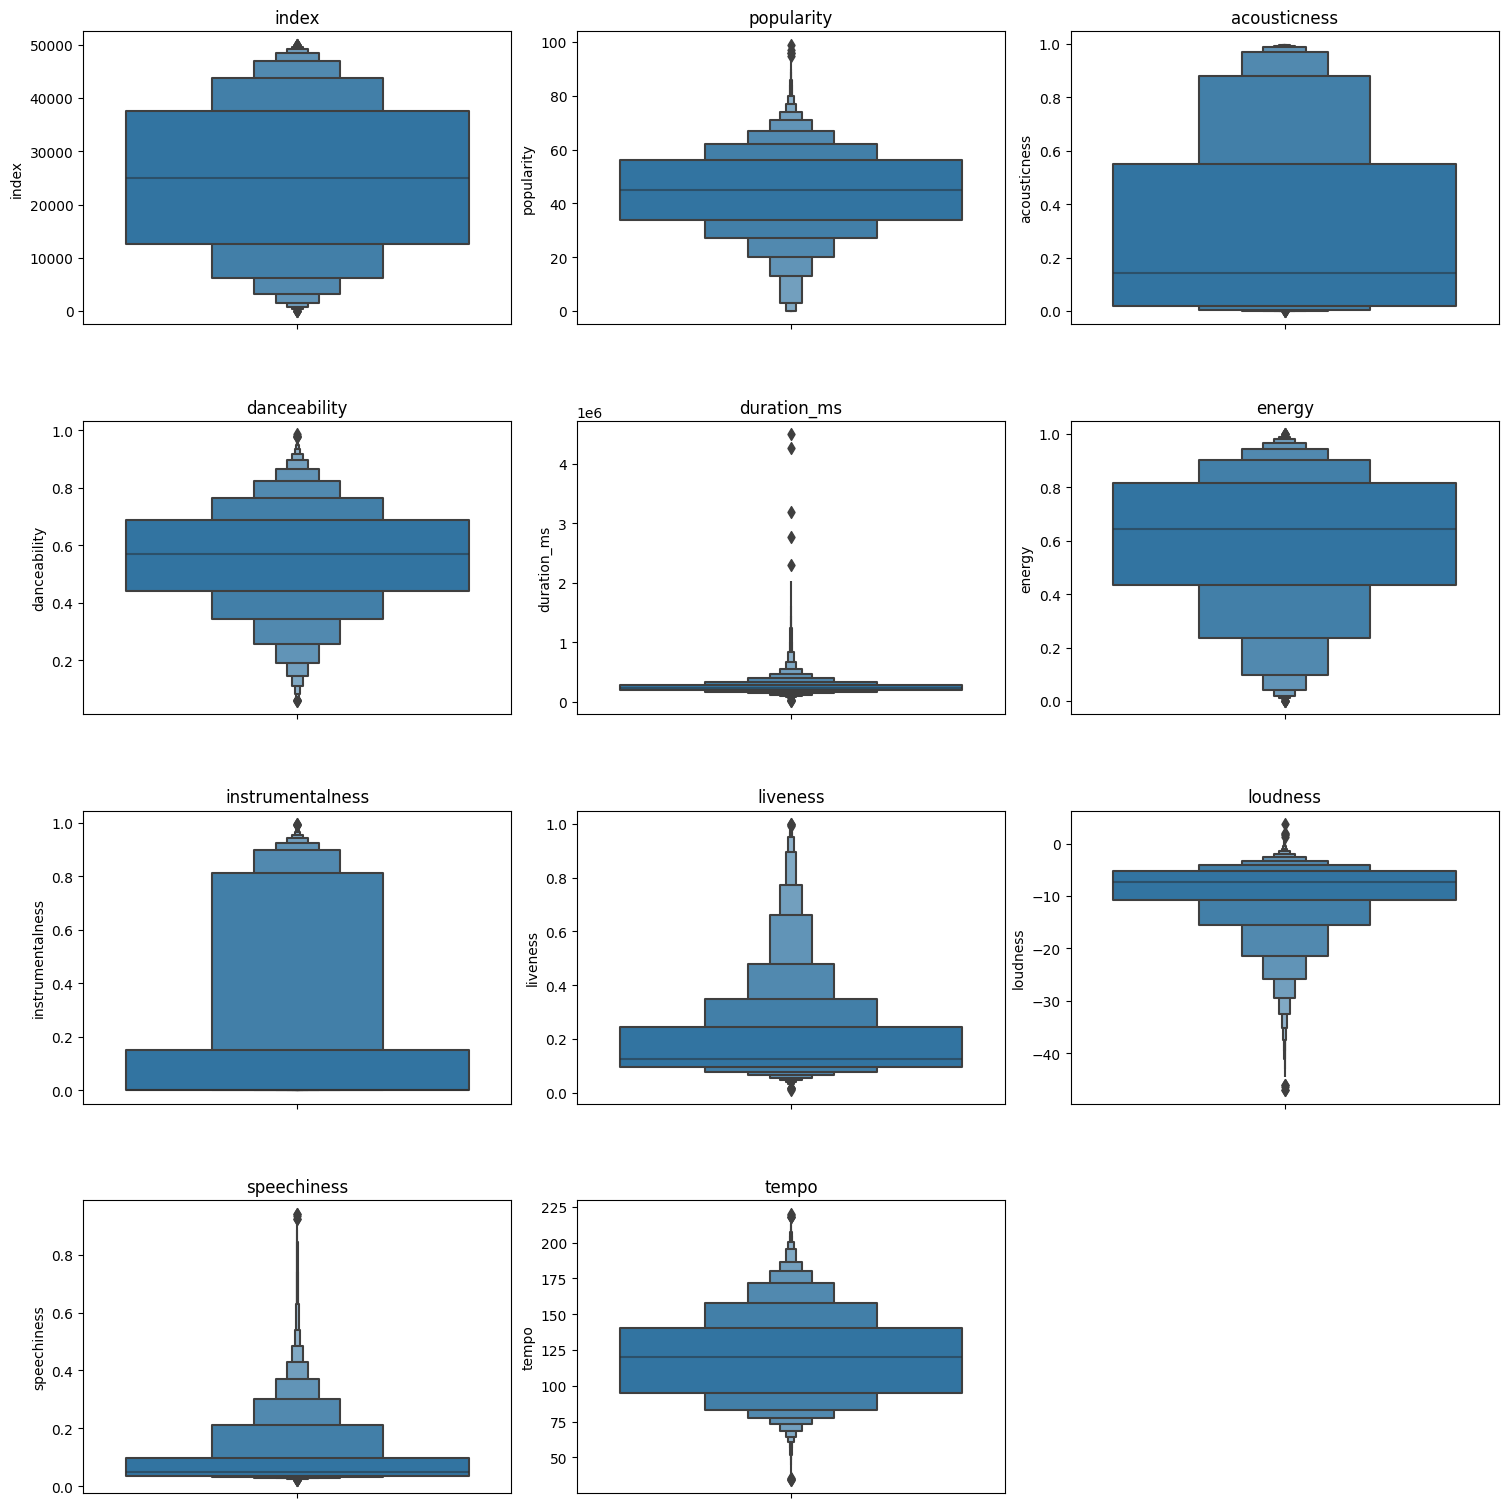

In [10]:
fig, axs = plt.subplots(ncols = 3, nrows = 4, figsize = (15, 15))
fig.delaxes(axs[3][2])
idx = 0
axs = axs.flatten()
for k, v in numeric_features.items():
    sns.boxenplot(y=v, ax=axs[idx])
    axs[idx].set_title(k)
    idx += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Boxen plots: Boxen plots (also known as letter-value plots) are similar to box plots but provide more detail about the distribution, particularly in the tails. They can be useful for identifying outliers in datasets with complex distributions.

The data displays a few outliers in popularity, danceability, and tempo, while duration, instrumentalness, liveness, loudness, and speechiness have a large number of extreme values. Although it is common practice to remove outliers to prevent them from distorting model training and inference, in this case, the aim is to interpret classification outputs rather than creating the best model. Therefore, the outliers are not removed.



## 3c) Correlation between song genre and every variable. 

Variables with high correlation will be the predictors for our response. 
Below are the boxplots showing the correlation between song genres and acousticness

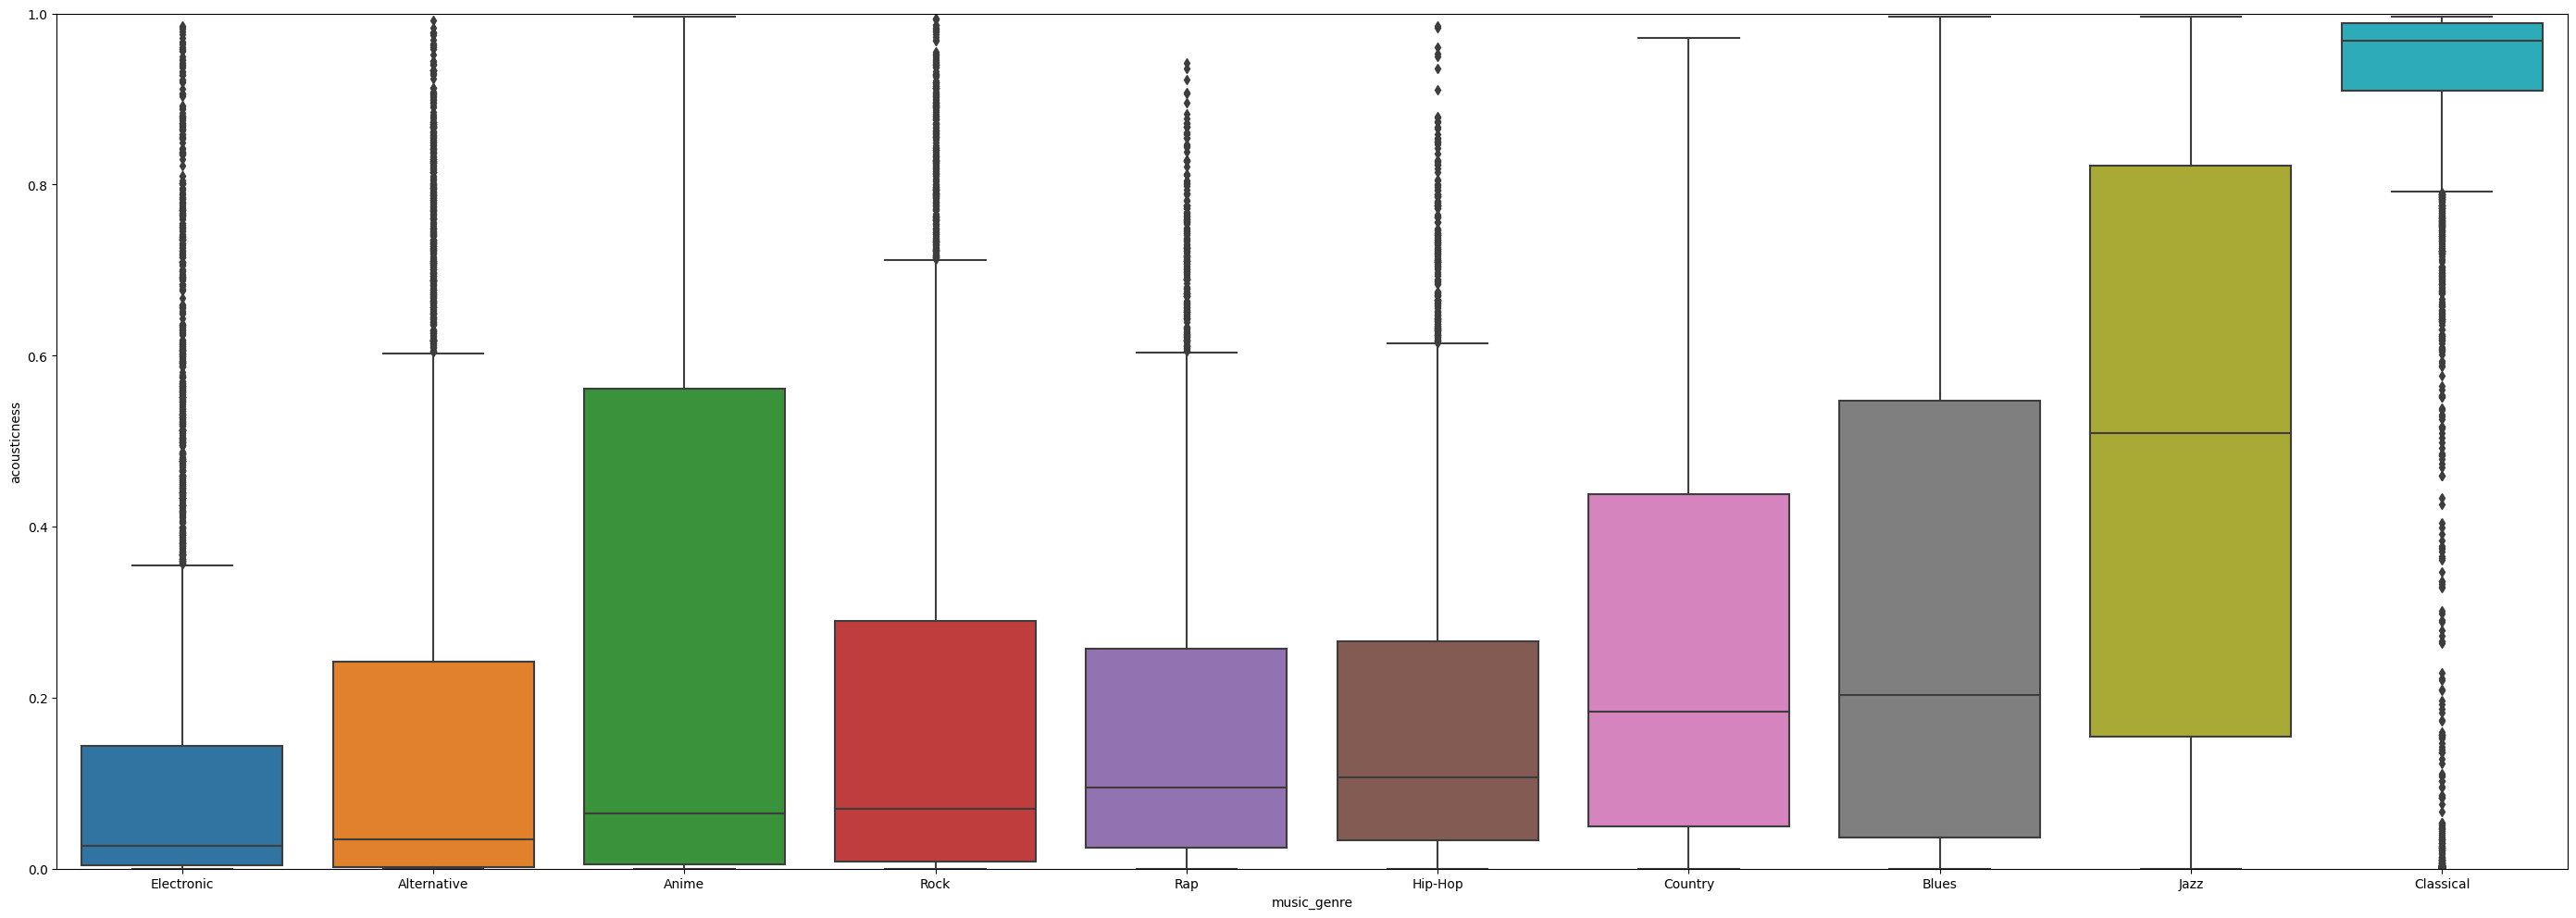

In [11]:
group_means=music.groupby(['music_genre'])['acousticness'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0,1.0)
sns.boxplot(x='music_genre', y='acousticness', order=group_means.index,data=music)
plt.show()

Below are the boxplots showing the correlation between song genres and energy

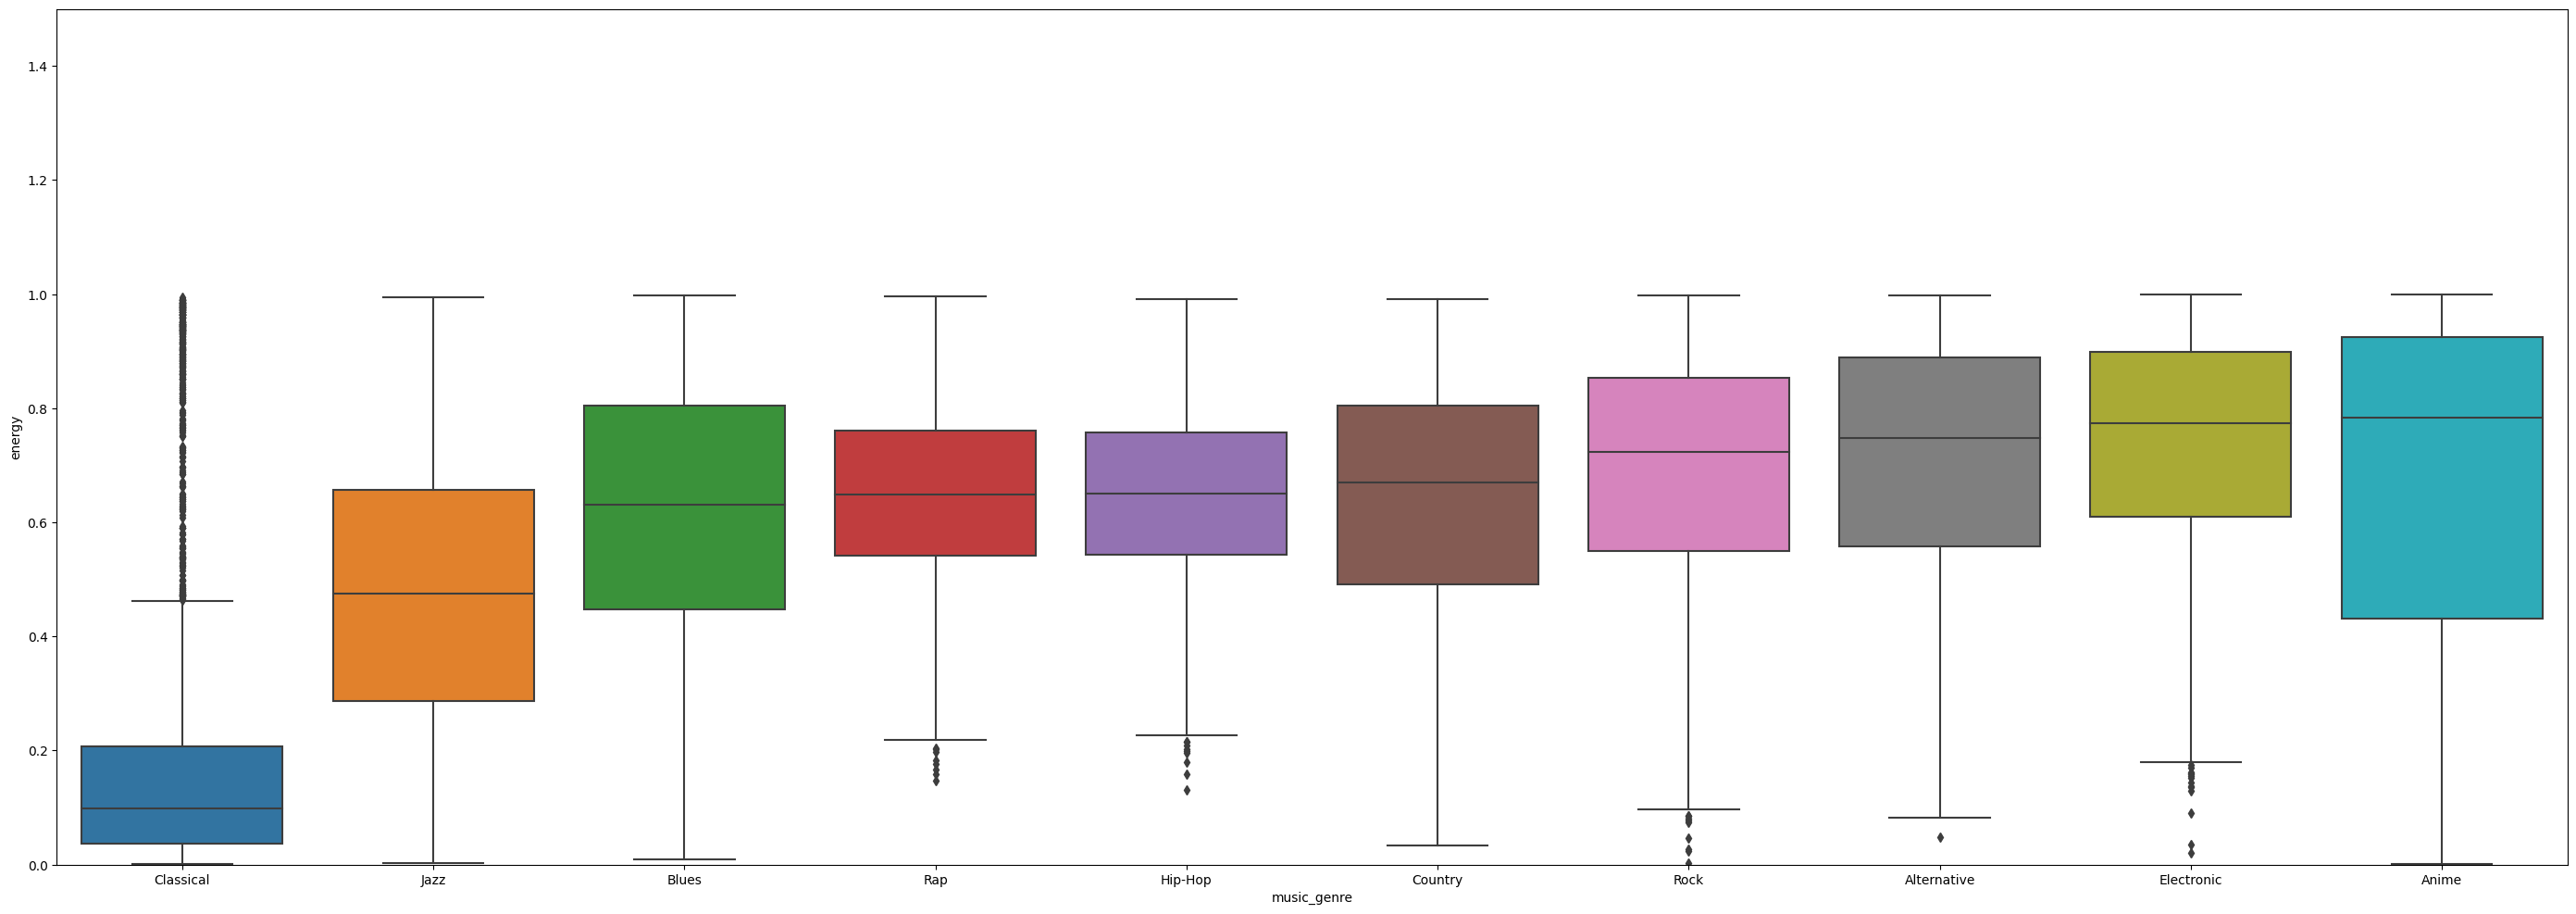

In [12]:
group_means=music.groupby(['music_genre'])['energy'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0.0,1.5)
sns.boxplot(x='music_genre', y='energy', order=group_means.index,data=music)
plt.show()

Below are the boxplots showing the correlation between song genres and popularity

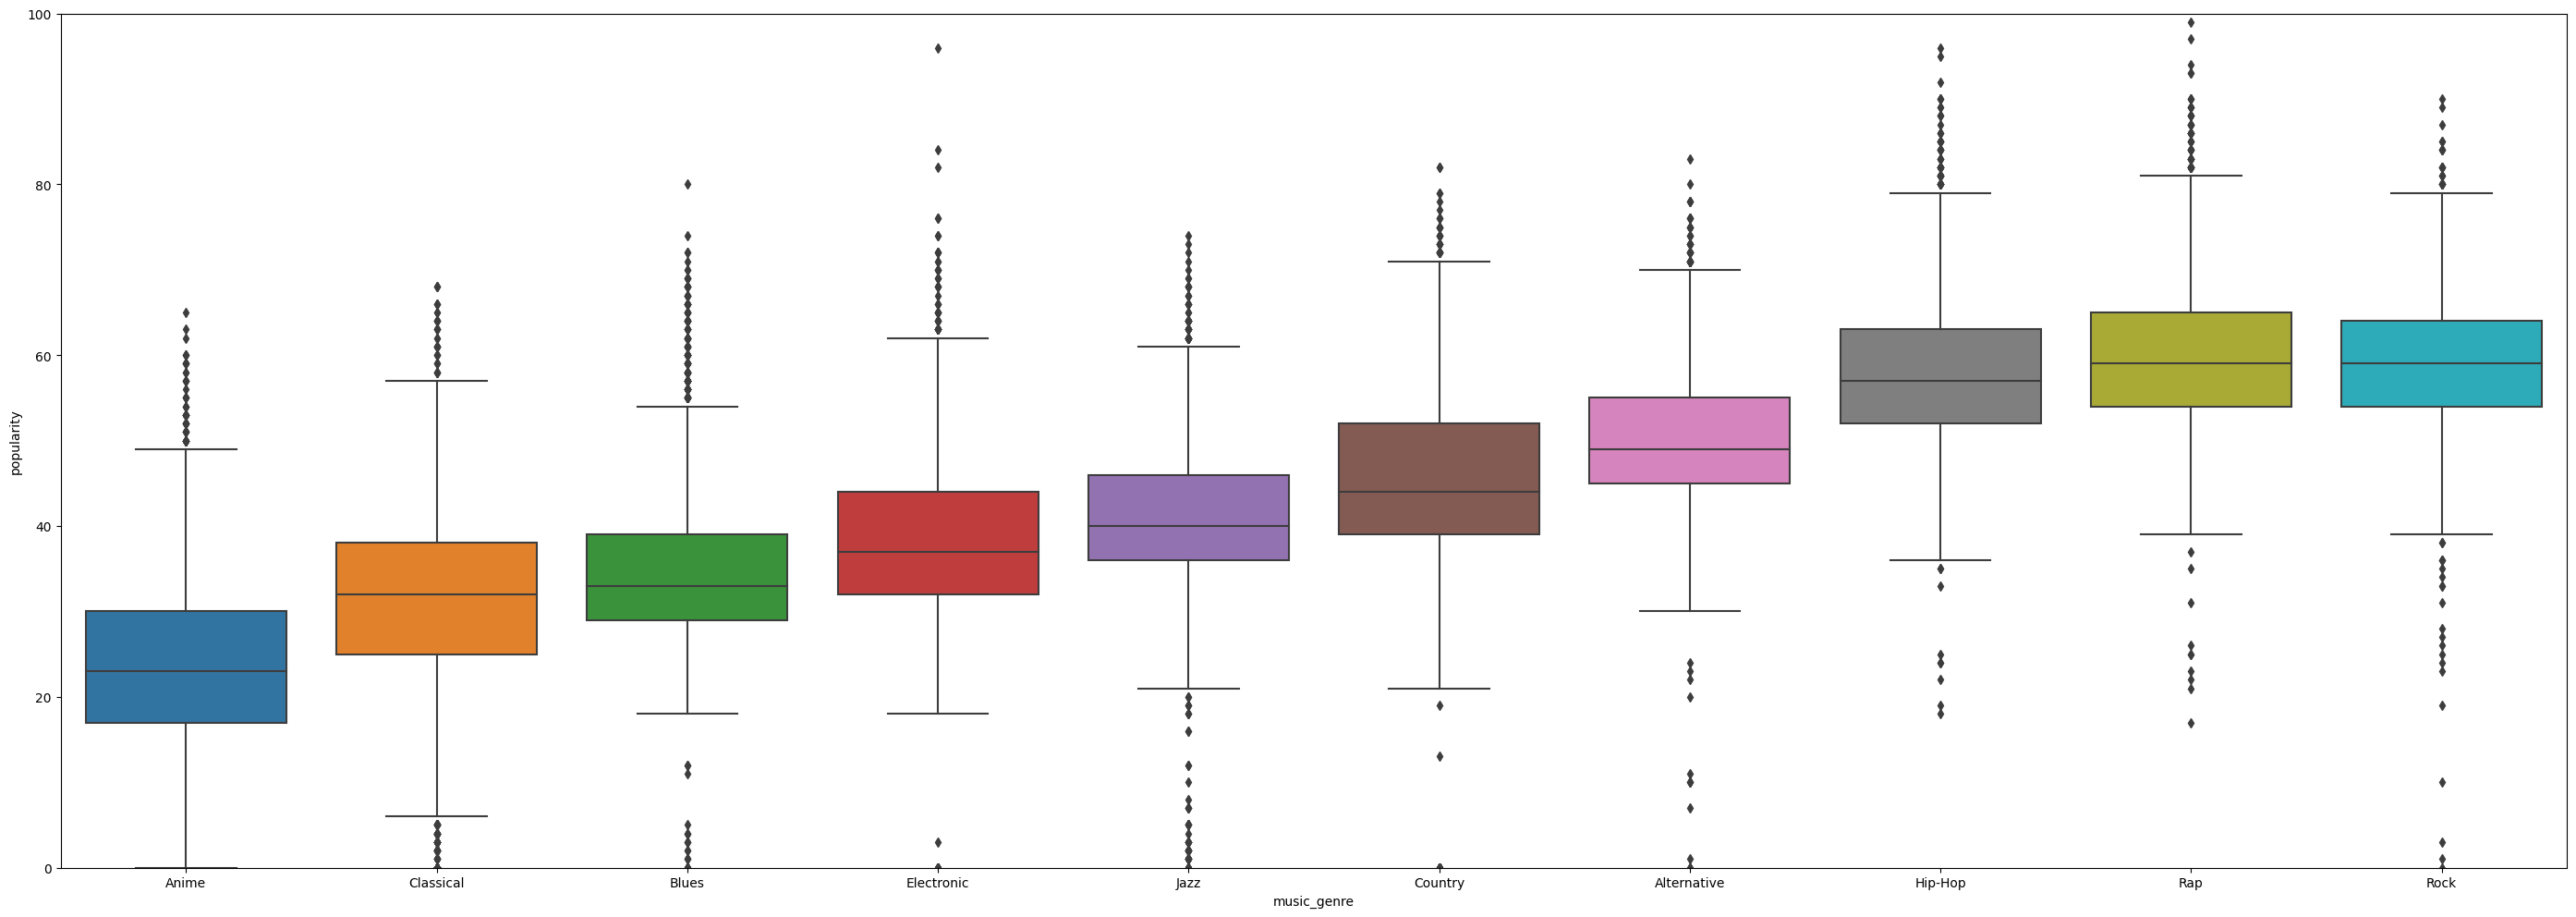

In [13]:
group_means=music.groupby(['music_genre'])['popularity'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0.0,100)
sns.boxplot(x='music_genre', y='popularity', order=group_means.index,data=music)
plt.show()

Below are the boxplots showing the correlation between song genres and danceability

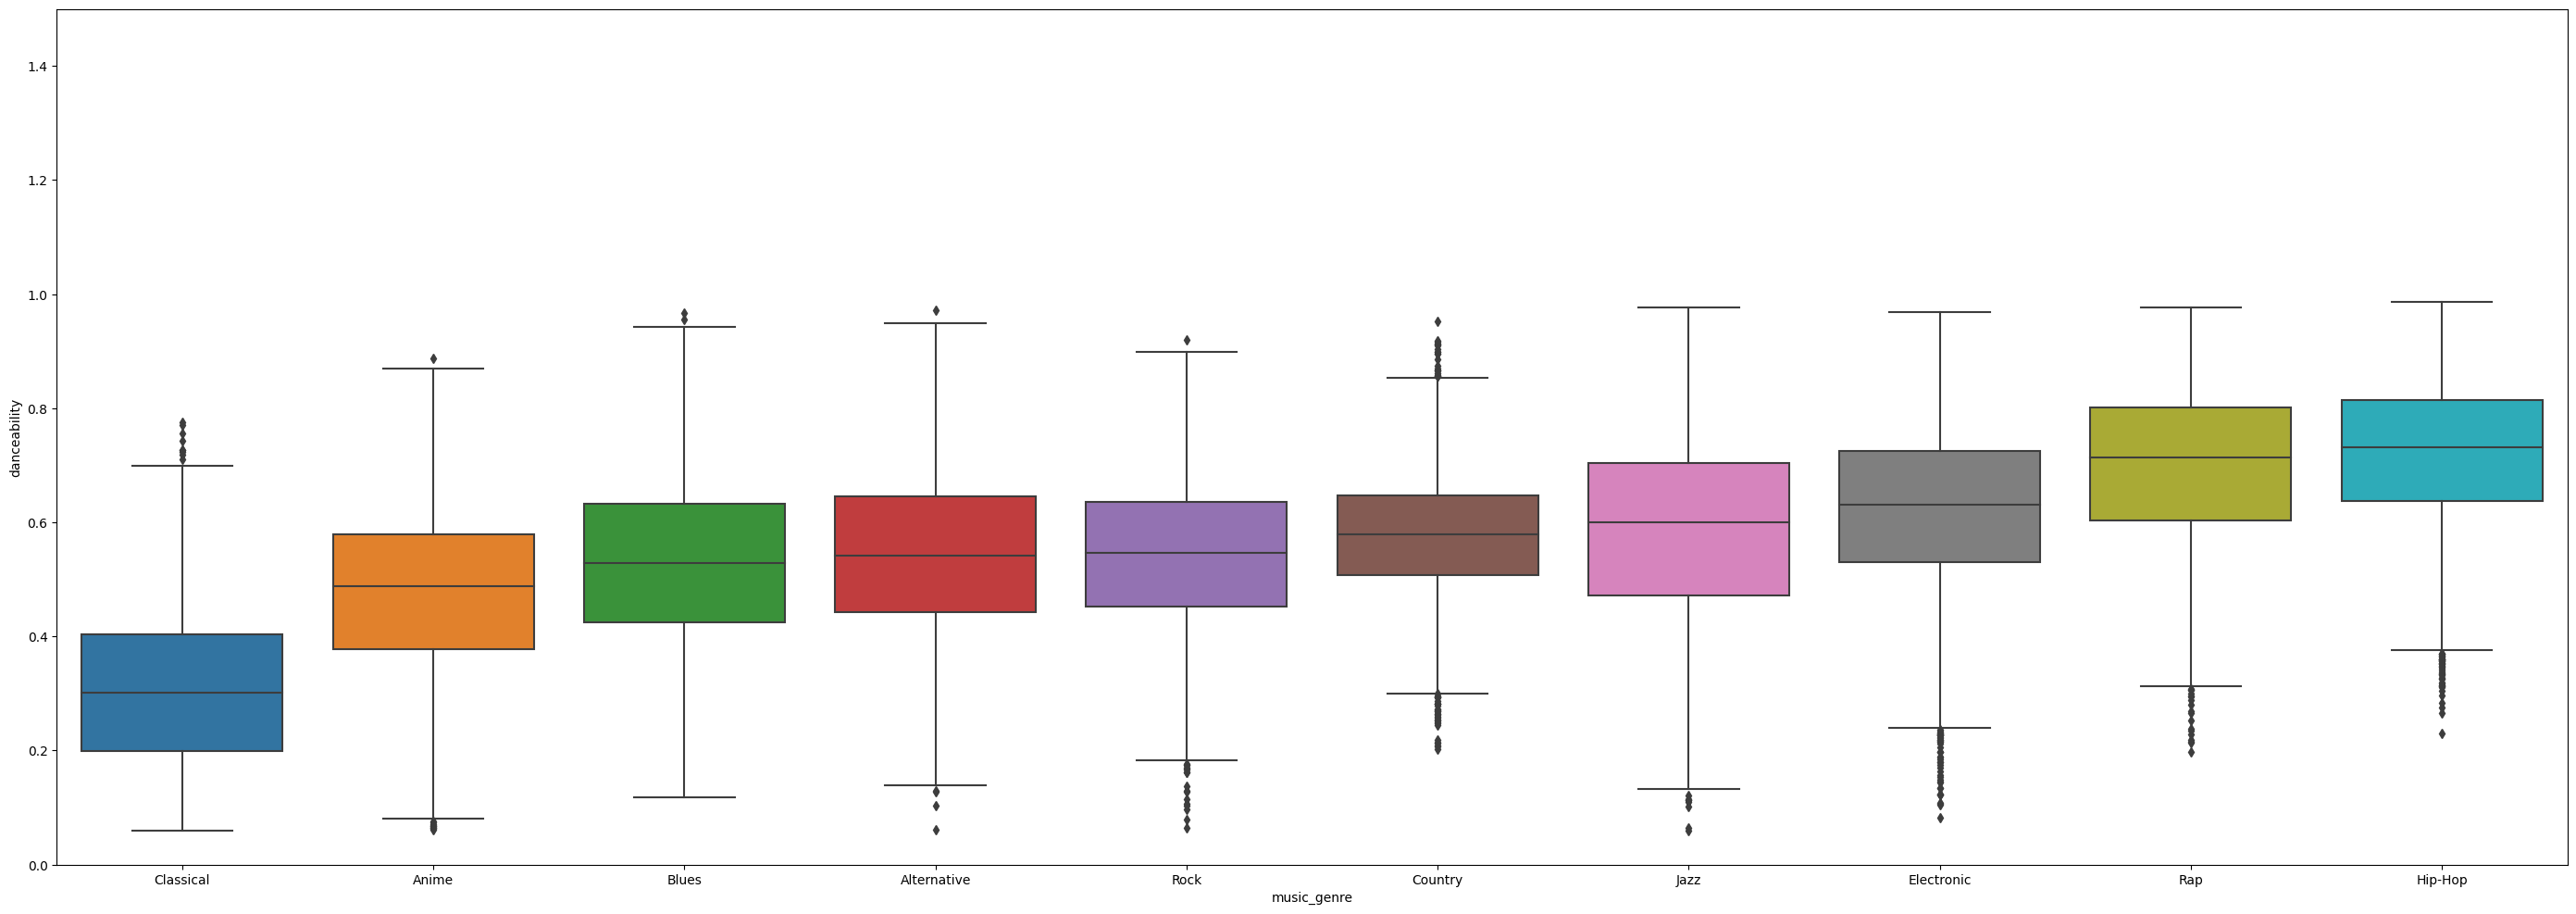

In [14]:
group_means=music.groupby(['music_genre'])['danceability'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0.0,1.5)
sns.boxplot(x='music_genre', y='danceability', order=group_means.index,data=music)
plt.show()

Below are the boxplots showing the correlation between song genres and duration_ms

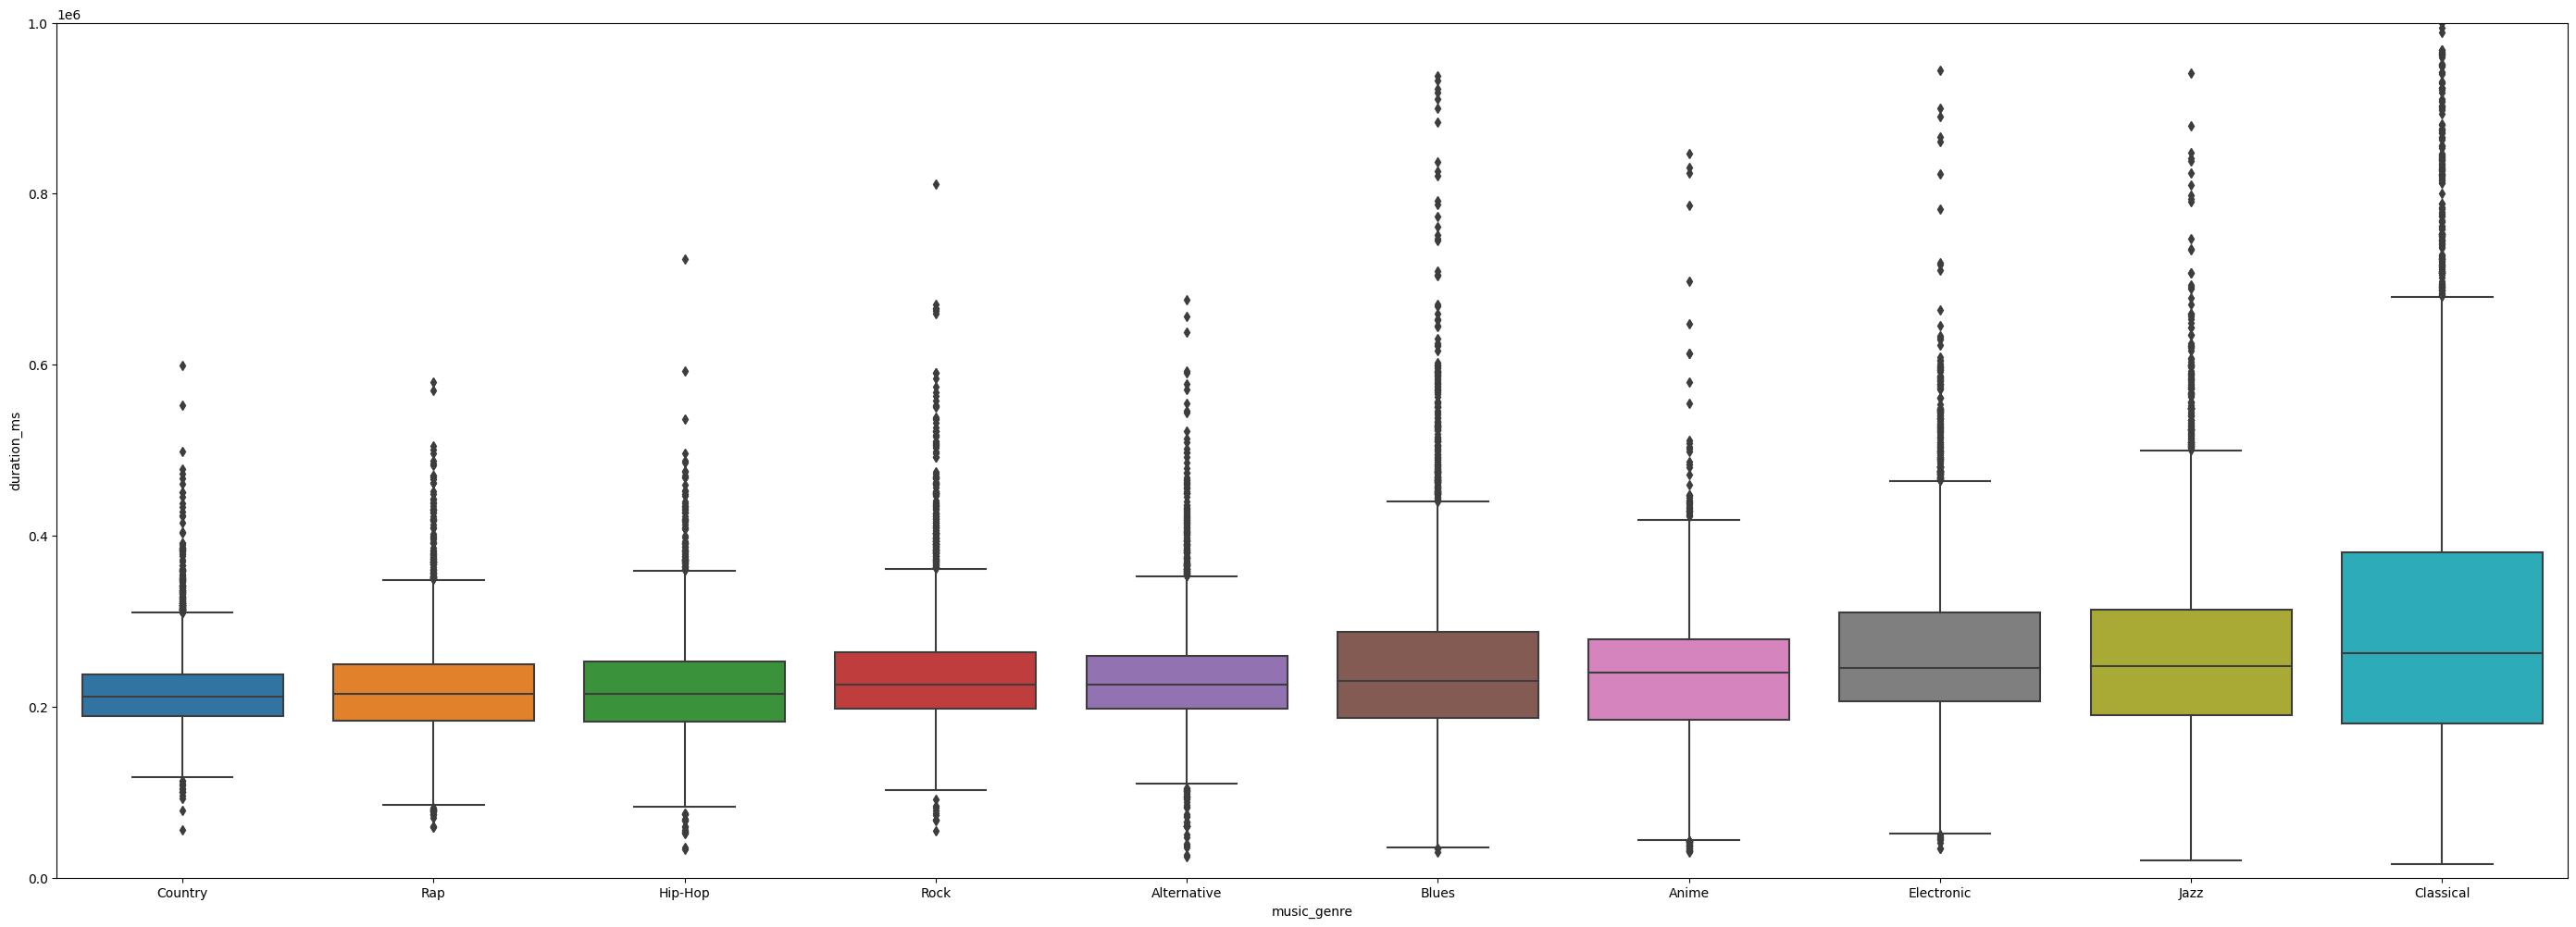

In [15]:
group_means=music.groupby(['music_genre'])['duration_ms'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0.0,1000000)
sns.boxplot(x='music_genre', y='duration_ms', order=group_means.index,data=music)
plt.show()

Below are the boxplots showing the correlation between song genres and liveness

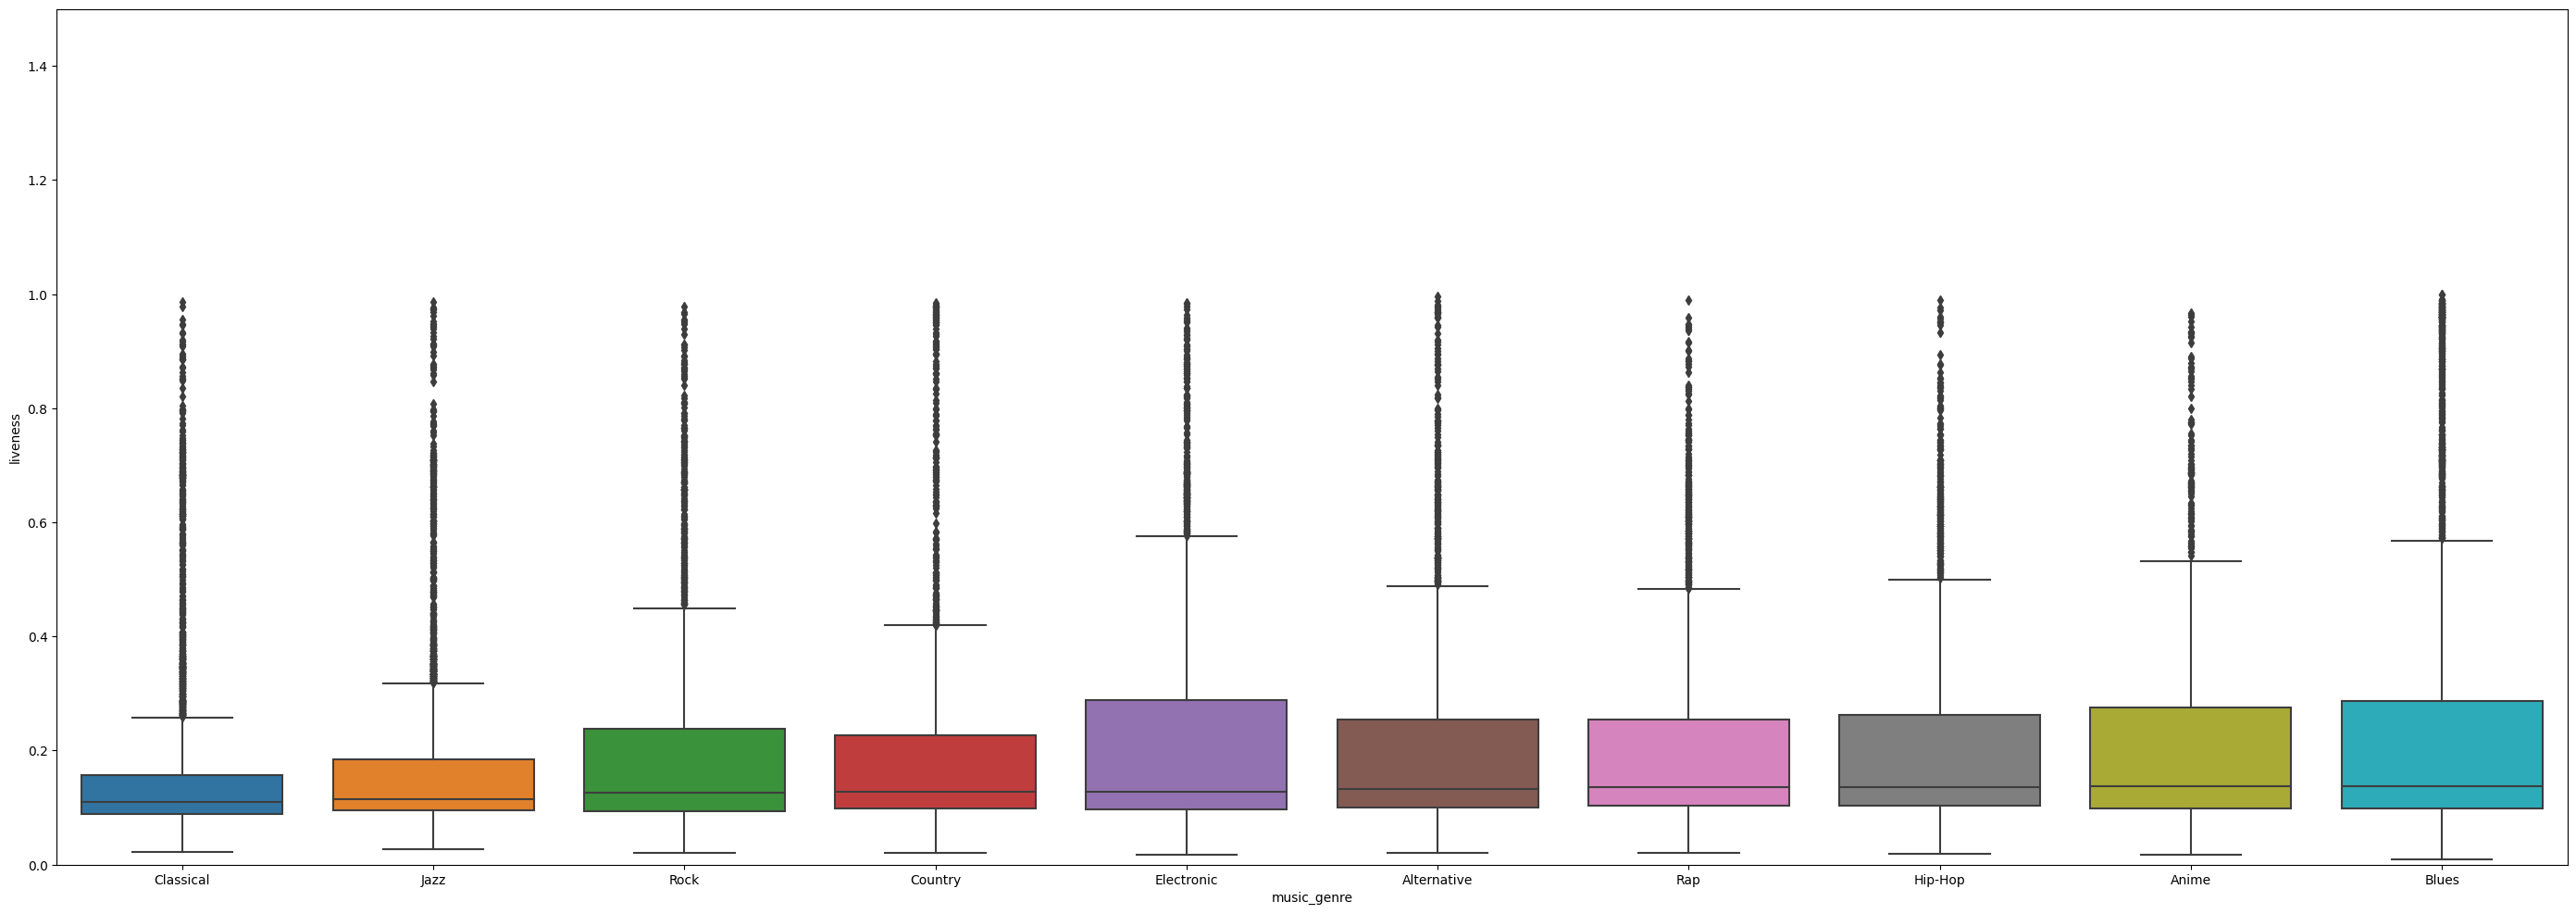

In [16]:
group_means=music.groupby(['music_genre'])['liveness'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0.0,1.5)
sns.boxplot(x='music_genre', y='liveness', order=group_means.index,data=music)
plt.show()

Below are the boxplots showing the correlation between song genres and loudness

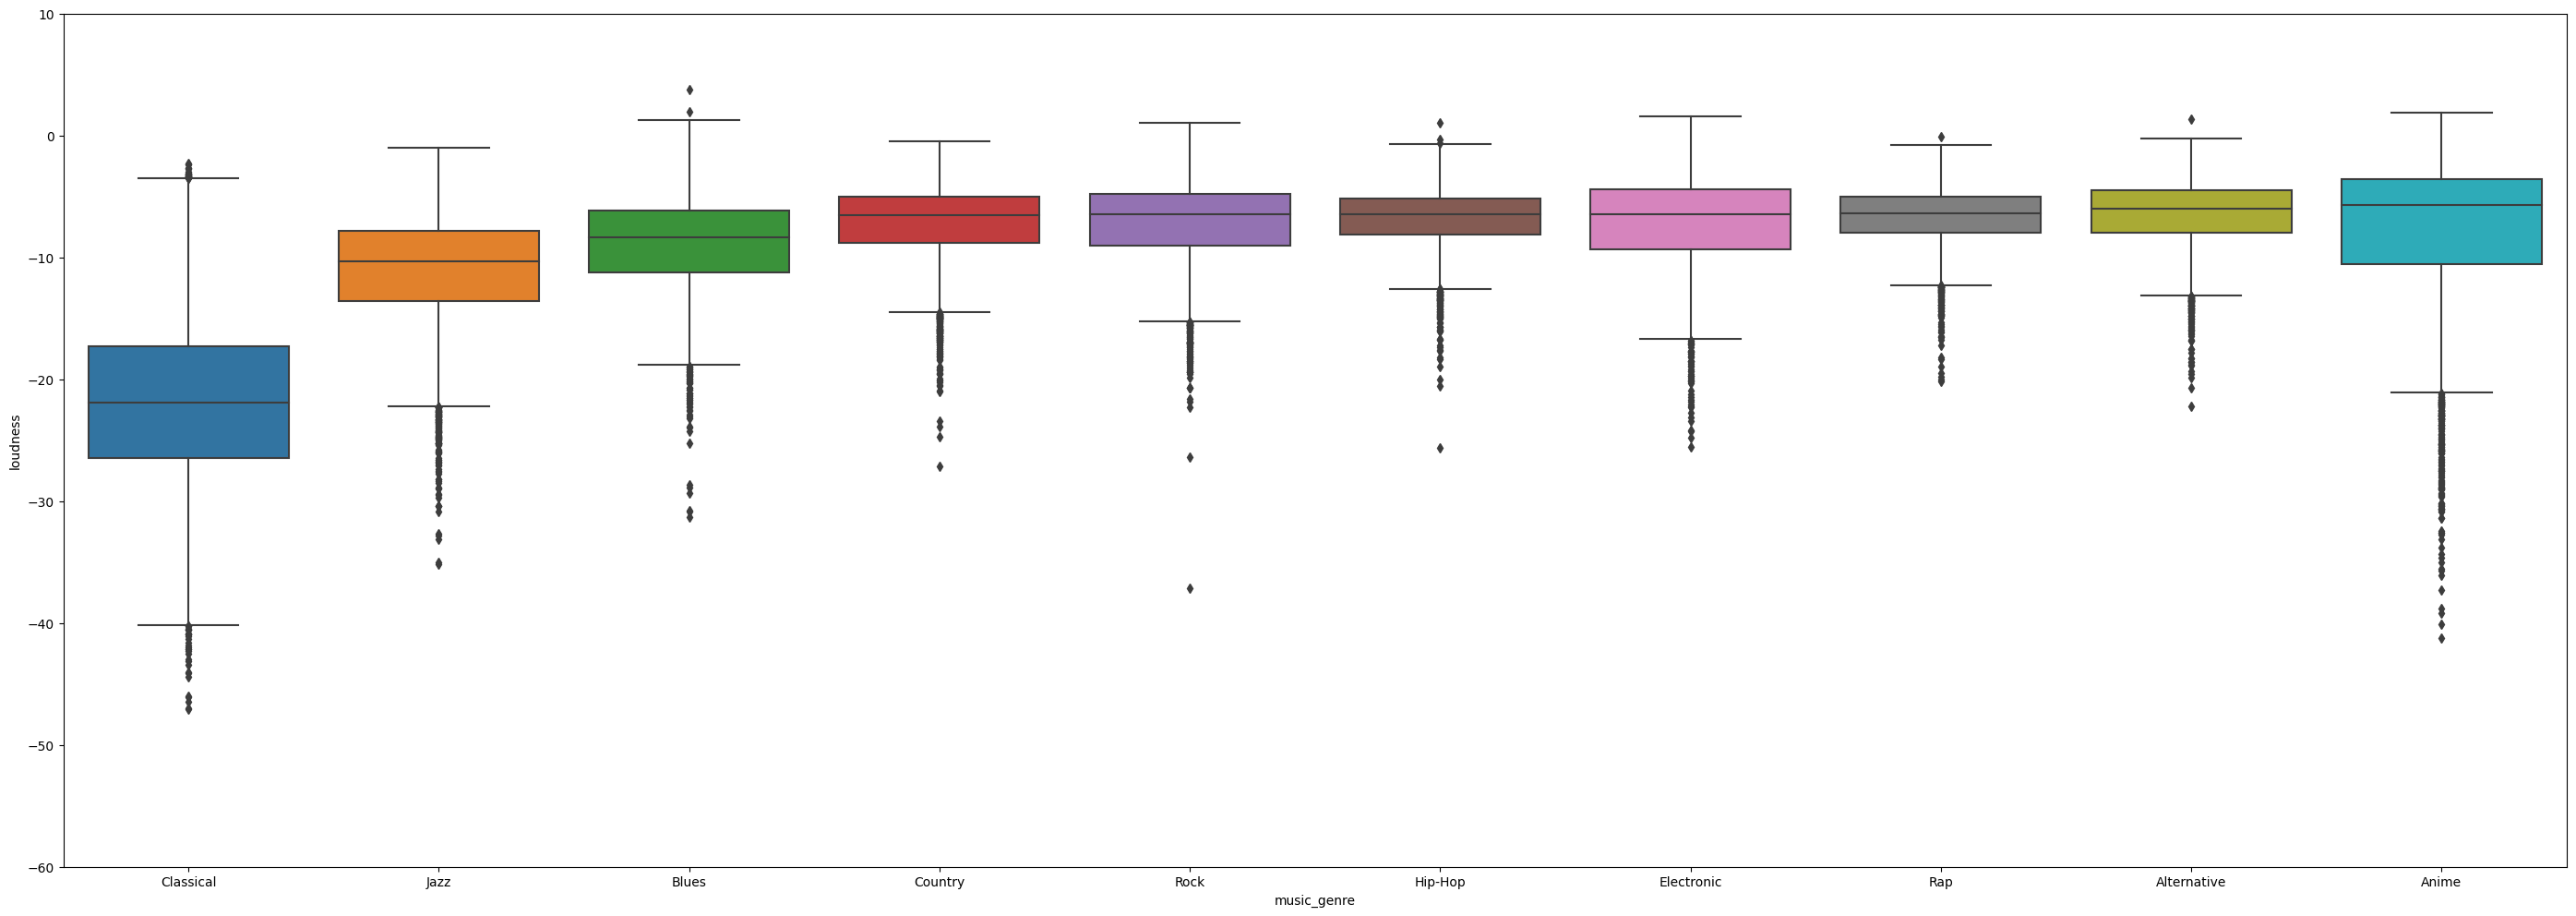

In [17]:
group_means=music.groupby(['music_genre'])['loudness'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(-60,10)
sns.boxplot(x='music_genre', y='loudness', order=group_means.index,data=music)
plt.show()

Below are the boxplots showing the correlation between song genres and speechiness

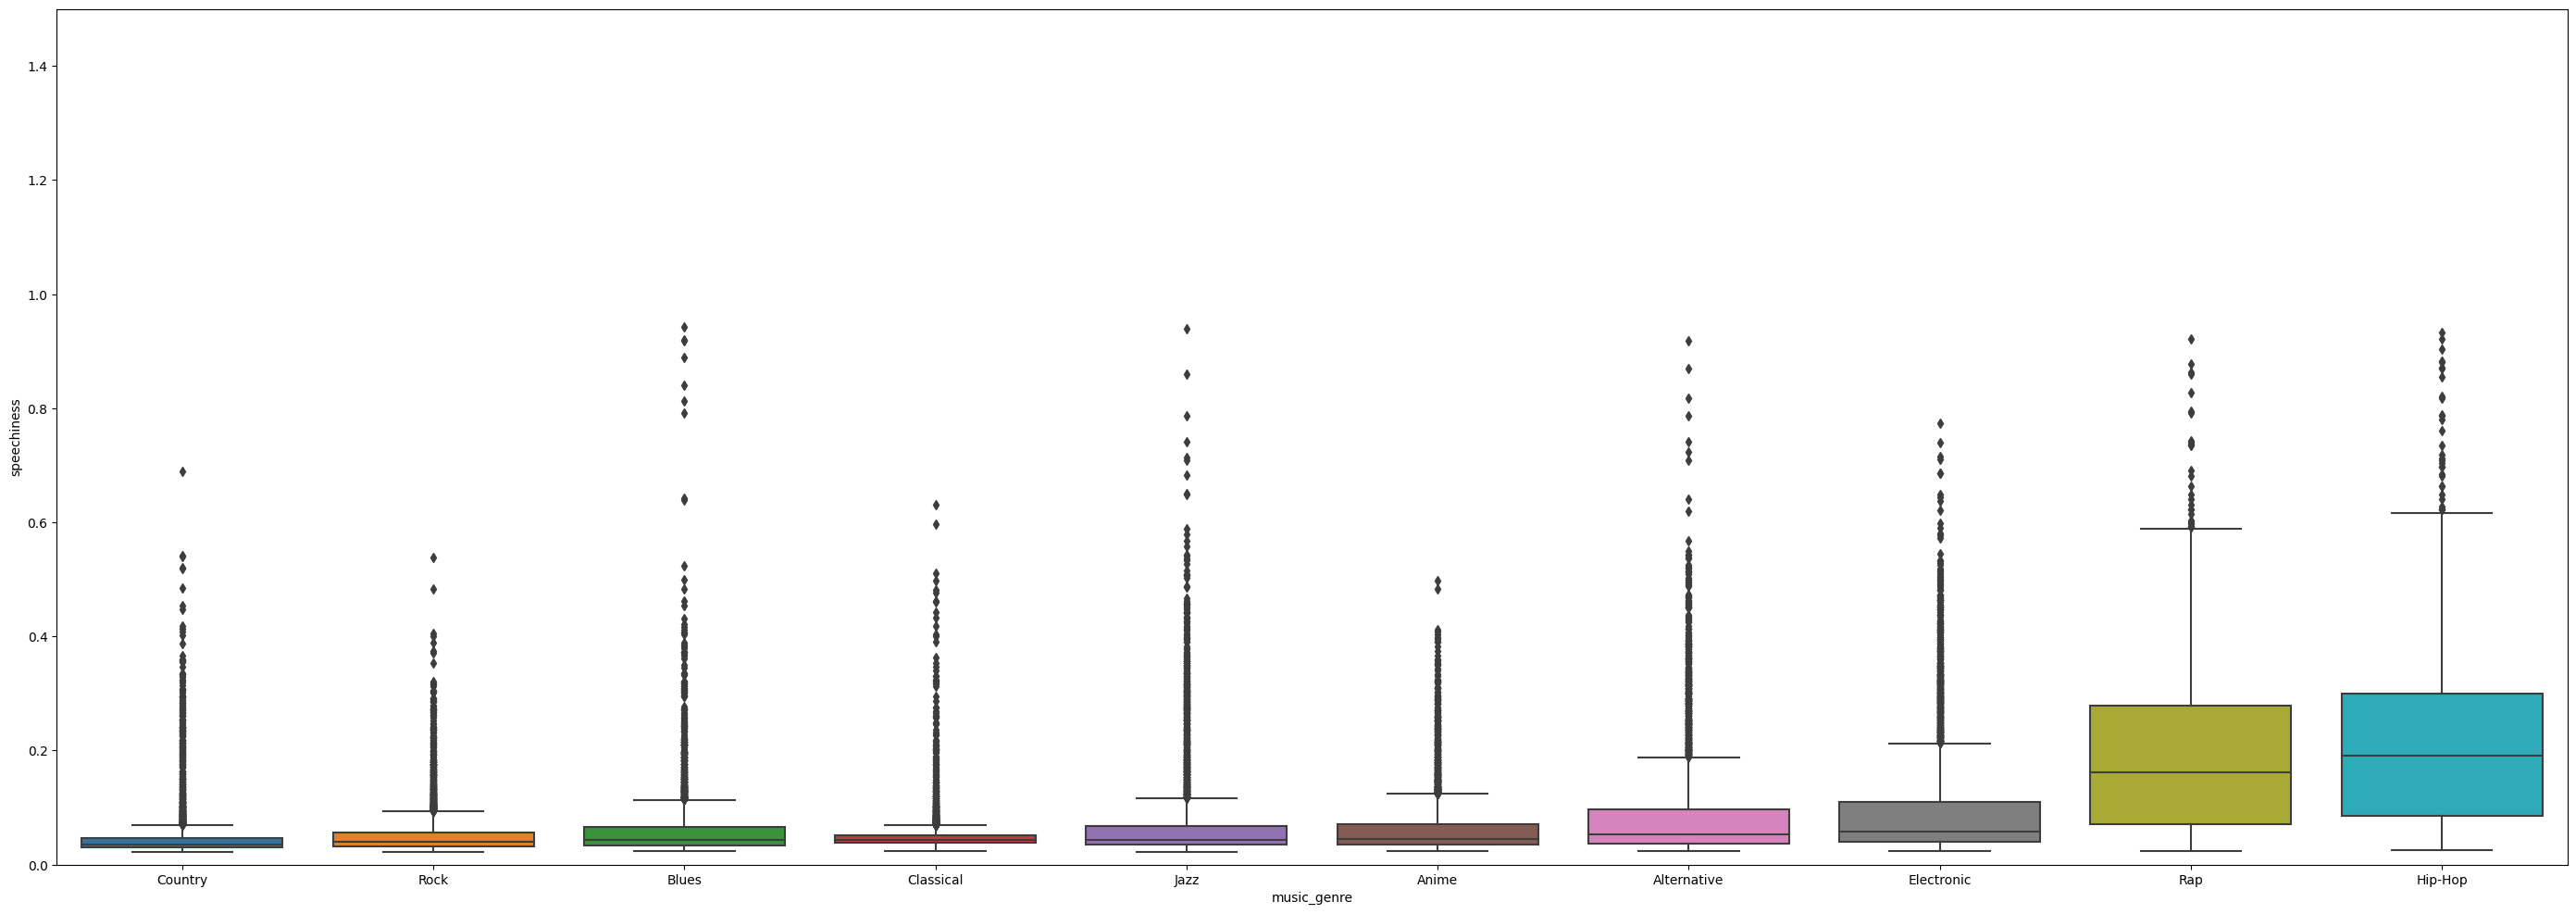

In [18]:
group_means=music.groupby(['music_genre'])['speechiness'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0.0,1.5)
sns.boxplot(x='music_genre', y='speechiness', order=group_means.index,data=music)
plt.show()

Below are the boxplots showing the correlation between song genres and valence

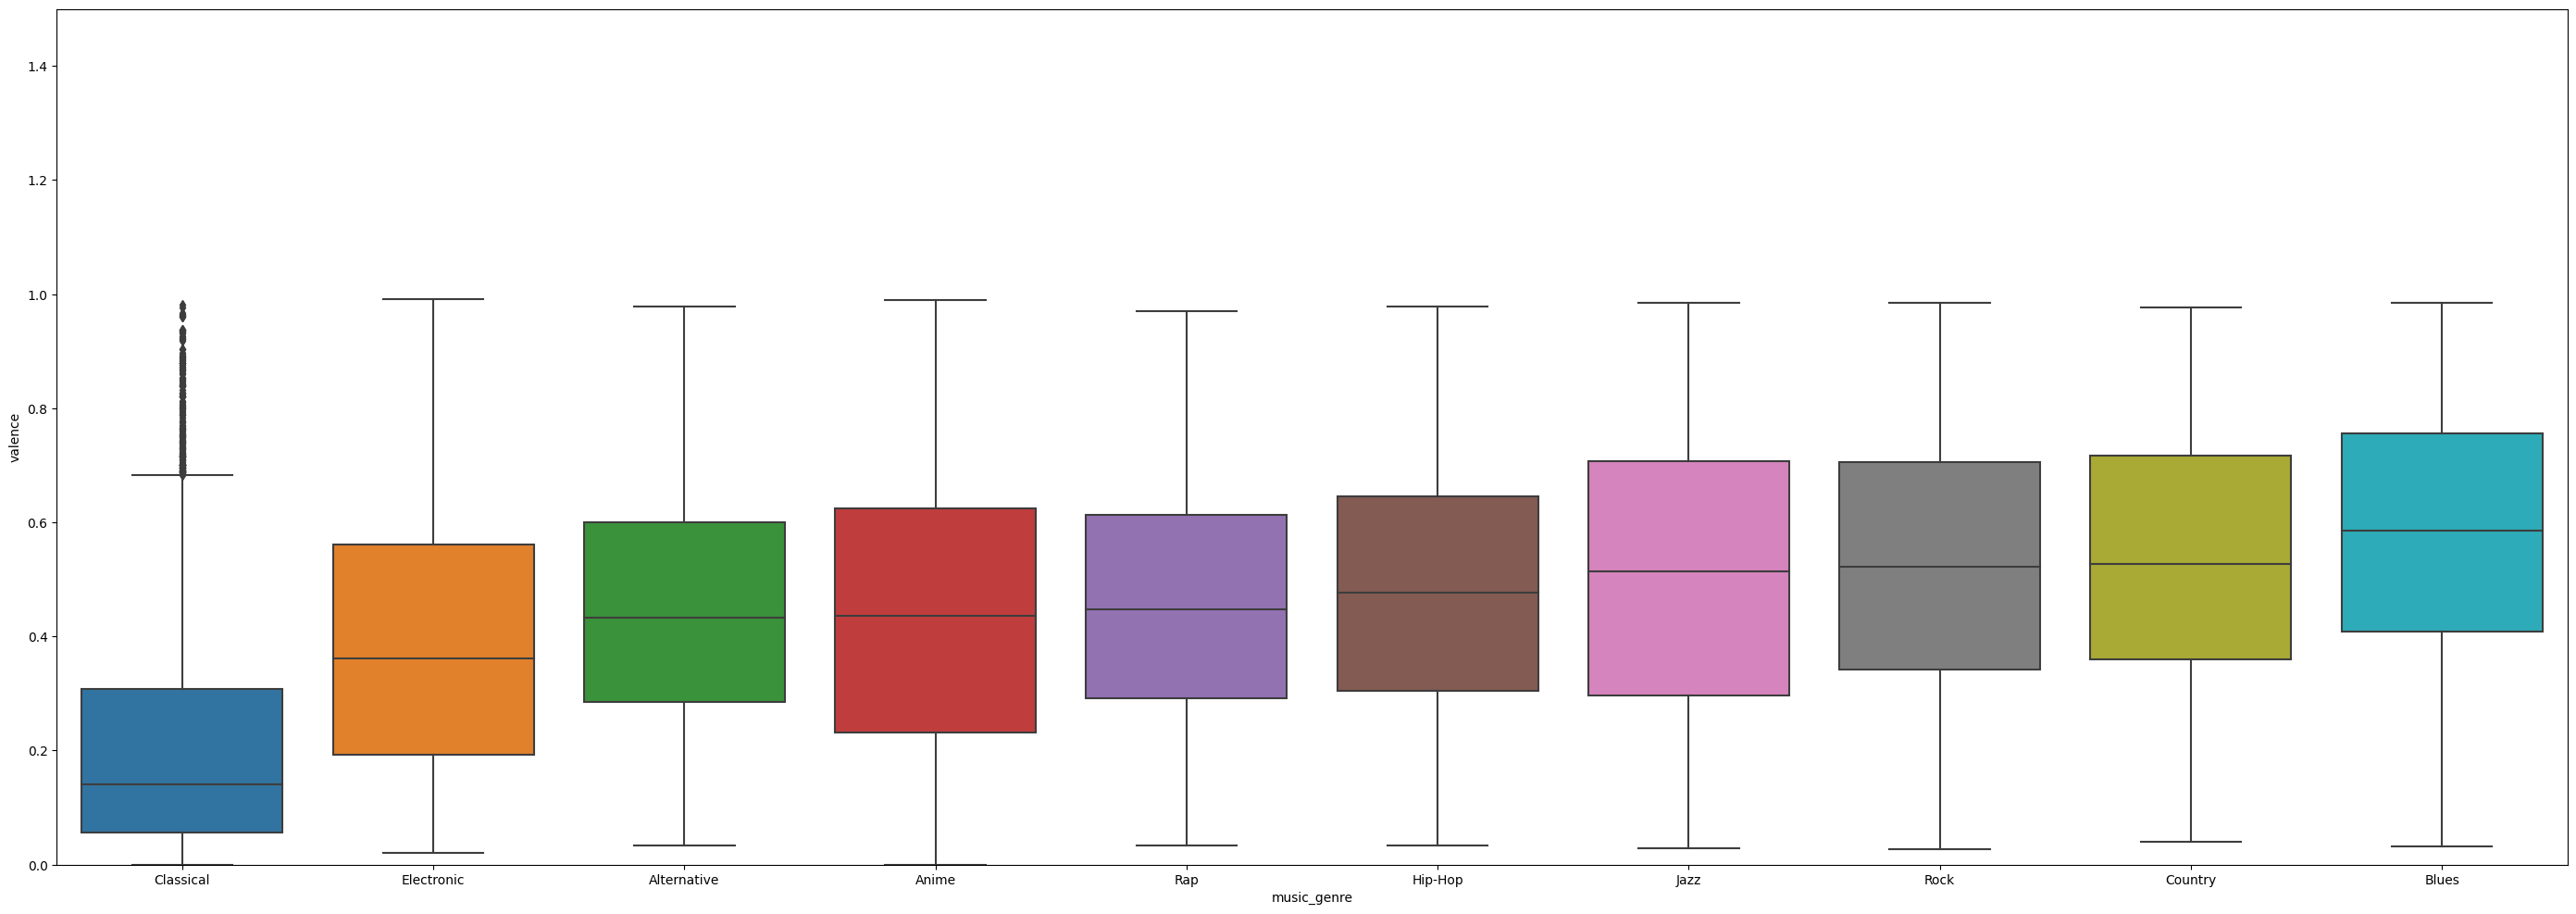

In [19]:
group_means=music.groupby(['music_genre'])['valence'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0.0,1.5)
sns.boxplot(x='music_genre', y='valence', order=group_means.index,data=music)
plt.show()

Below are the boxplots showing the correlation between song genres and tempo

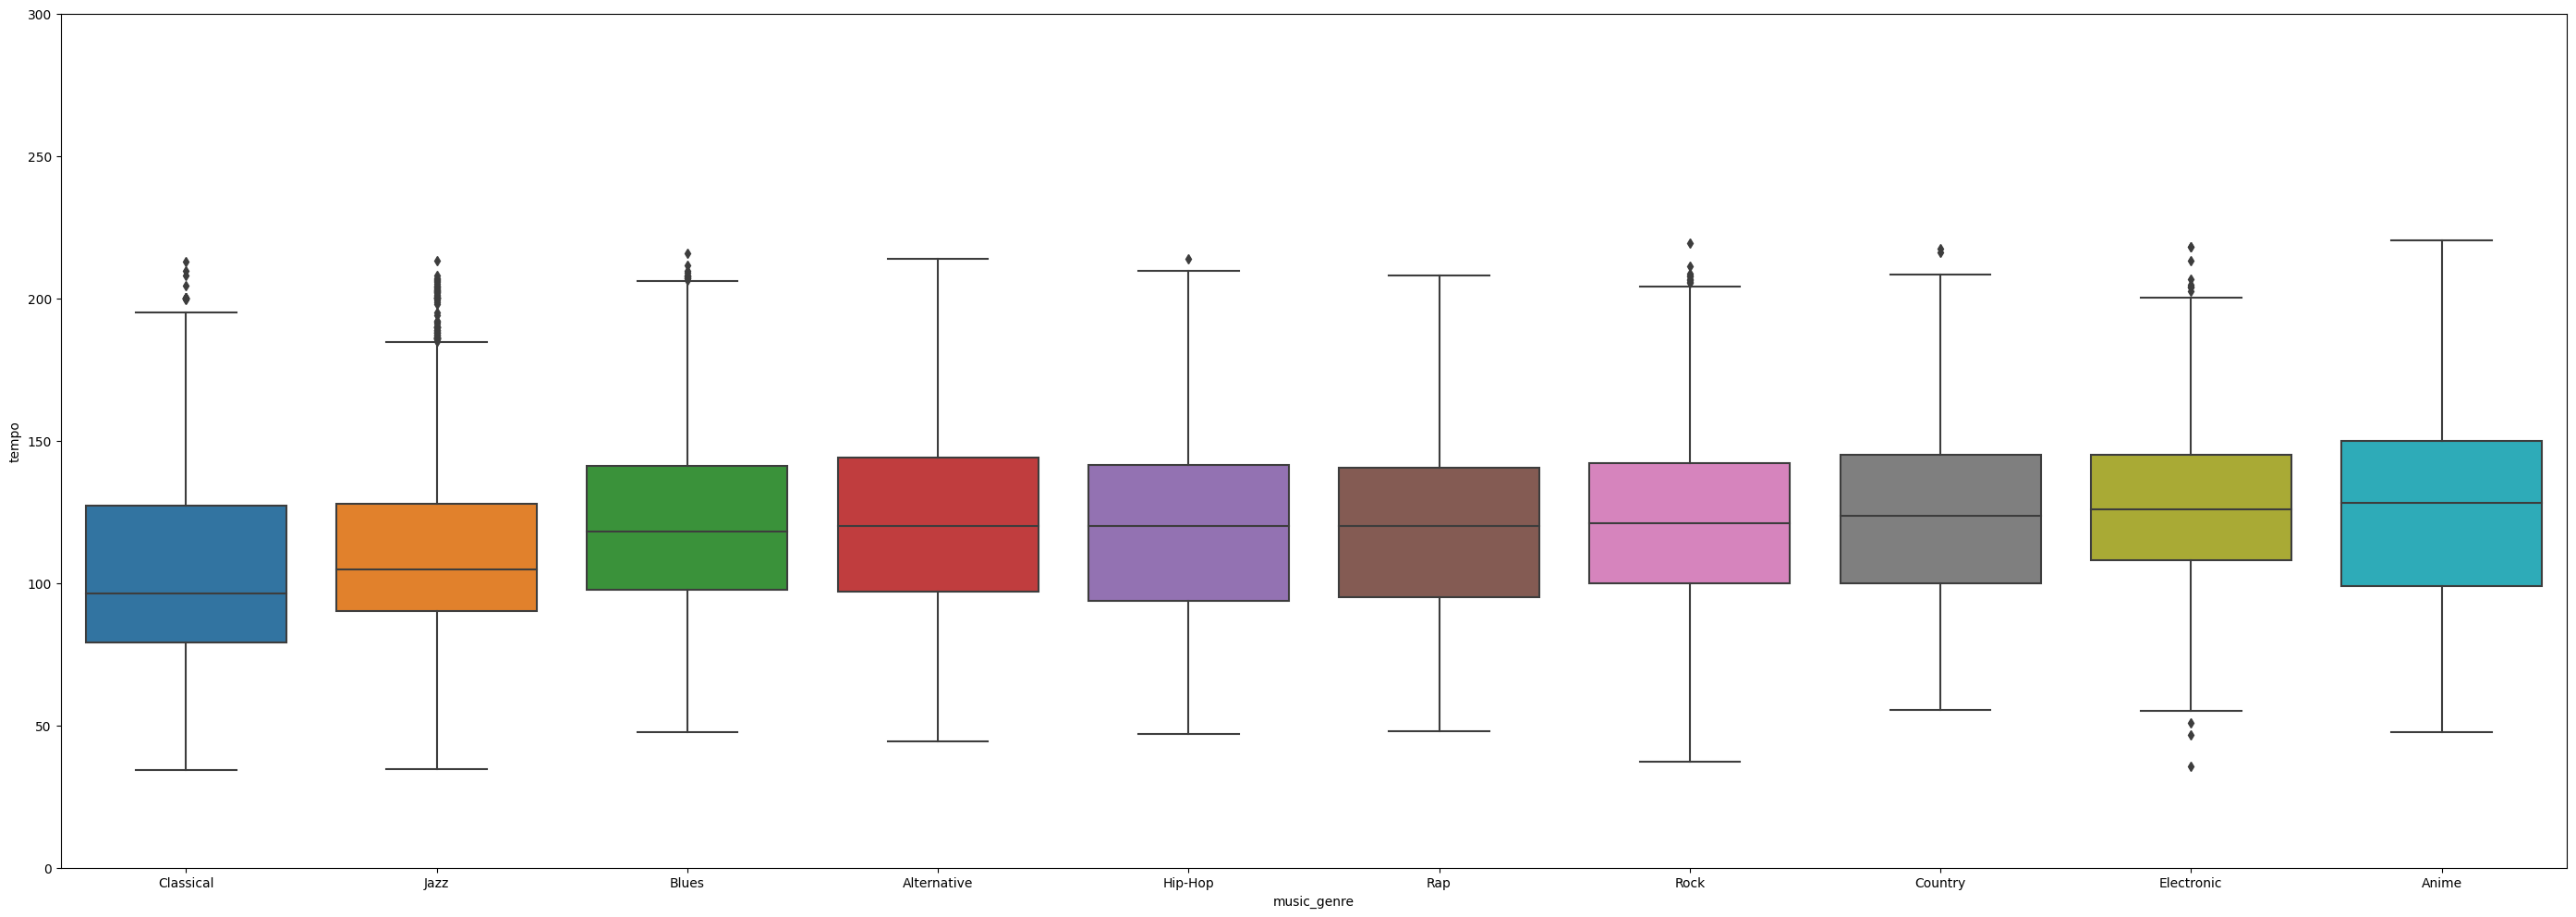

In [20]:
group_means=music.groupby(['music_genre'])['tempo'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0,300)
sns.boxplot(x='music_genre', y='tempo', order=group_means.index,data=music)
plt.show()

Of all the numeric variables, the line connecting the medians of the boxplots in popularity vs genre was the closest to linear. This means that different genres enjoy different levels of popularity, with Hip-Hop and R&B being the most popular genres and Classical the Least.

Even though the correlation between the remaining variables was not that high, there was still a slight association between each characteristic and the corresponding genre, for instance, the variable "Loudness." Out of all the variables, loudness has the weakest correlation. The line linking the boxplot medians resembles a horizontal line and boxplots are overlapping each other. However, the spread of each boxplot between the first quartile and third quartile still varies slightly. This tiny discrepancy might aid in determining the genre. 

In this project, we have decided to use all numeric variables as the predictors for certain reasons. Firstly, we have many genre classes, it is really hard to predict the type of genre based on a few numeric variables. Based on the graph for each numeric variable, most of the genre classes have about the same median and spread between first quartile and third quartile. It will be very hard to do machine learning if there’s only a few predictors. Only with all numeric variables as predictors, can we distinguish the difference.

## Chi - Square Test


Now, we will calculate the correlation between the categorical variables and the genre. This will help us understand the relation between the variables, following which we will have a clearer idea of which variables to choose as our predictors.

The correlation will be calculated using the Chi-Square Test, which finds the probability of a null hypothesis (H0). It starts out with the hypothesis H0 : that the two categorical variables are not related to each other. It then generates the probability, called the p-value, that the hypothesis is true, i.e. they are not related to each other.

If the returned p-value is above 0.5, usually we can assume that the two variables are not related. If the p-value falls below 0.5, they have a fairly strong correlation.

Below is the calculation of p-value for acousticness and genre.

In [21]:
music.dtypes

index                 int64
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
valence             float64
music_genre          object
dtype: object

As we can see here, the categorical variables apart from genre are 'key' and 'mode'. We will now calculate the p-values of these variables with the categorical variable 'genre'.

In [22]:
# importing required functions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

Below is the p-value calculation for genre and key.

In [23]:
# contingency table
table = pd.crosstab(music['music_genre'],music['key'], margins = False)
stat, p, dof, expected = chi2_contingency(table)
print(f"chi2 statistic:     {stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")


chi2 statistic:     2022.8
p-value:            0
degrees of freedom: 99


Below is the p-value calculation for genre and mode of the song.

In [24]:
# contingency table
table = pd.crosstab(music['music_genre'],music['mode'], margins = False)
stat, p, dof, expected = chi2_contingency(table)
print(f"chi2 statistic:     {stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")


chi2 statistic:     1898.1
p-value:            0
degrees of freedom: 9


As we can see from the above calculations, the p-values for all of these variables is 0.0, which could be read to imply that the genre of the song is dependent on all these variables. However, this could also be because the frequencies or counts vary by large amounts across the columns. We will consider these variables in our prediction model because they clearly have a correlation with the genre of the song.

In [25]:
music.to_csv('cleaned_music.csv')

Since we just removed column from dataframe. We need to update the old csv file.